In [172]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [173]:
def make_plot(title,accuracy,precision,recall):
    categories = ['Decision Tree','KNN', 'Bayes' , 'SVM']
    bar_width = 0.2

    r1 = np.arange(len(categories))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    plt.bar(r1, accuracy, color='b', width=bar_width, label='Accuracy')
    plt.bar(r2, precision, color='g', width=bar_width, label='Precision')
    plt.bar(r3, recall, color='r', width=bar_width, label='Recall')

    plt.title(title)
    plt.xlabel('Models', fontweight='bold')
    plt.ylabel('Score', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylim([0,1])

    plt.legend()

    plt.show()

Heart Disease

In [137]:
heart_data = pd.read_csv('heart_disease.csv',index_col=0)
heart_data.head()

x_heart = heart_data.drop('num', axis=1)
y_heart = heart_data['num']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_heart, y_heart, test_size=0.2, random_state=5)
accuracy_heart = []
precision_heart = []    
recall_heart = []

Decision Tree

Accuracy:  0.6
Precision:  0.570138888888889
Recall:  0.6
Confusion Matrix:


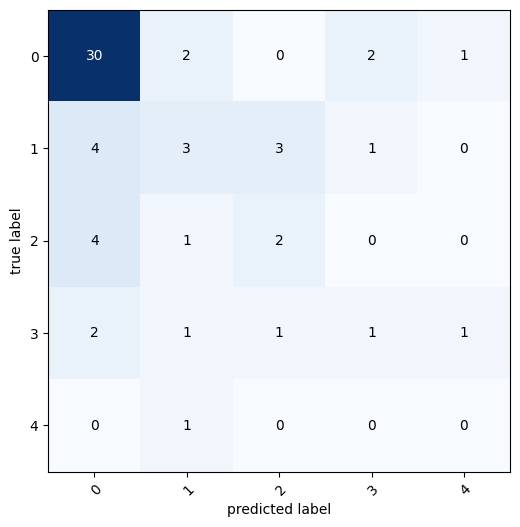

In [138]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['0', '1', '2', '3', '4'])
plt.show()
accuracy_heart.append(accuracy_score(y_test, y_pred))
precision_heart.append(precision_score(y_test, y_pred, average='weighted'))
recall_heart.append(recall_score(y_test, y_pred, average='weighted'))

KNN 

Accuracy:  0.5166666666666667
Precision:  0.3875
Recall:  0.5166666666666667
Confusion Matrix:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


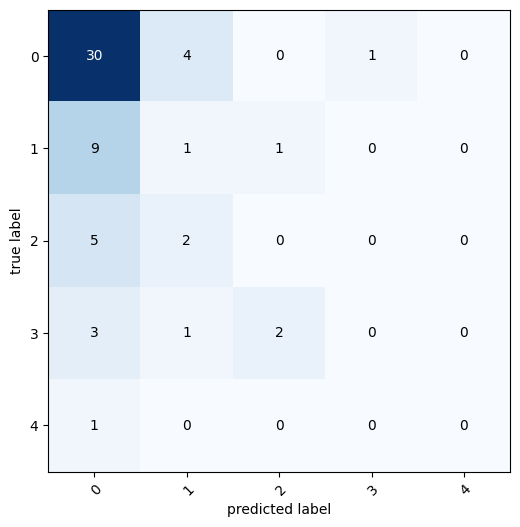

In [139]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['0', '1', '2', '3', '4'])
accuracy_heart.append(accuracy_score(y_test, y_pred))
precision_heart.append(precision_score(y_test, y_pred, average='weighted'))
recall_heart.append(recall_score(y_test, y_pred, average='weighted'))

Bayes

Accuracy:  0.6166666666666667
Precision:  0.6171296296296297
Recall:  0.6166666666666667
Confusion Matrix:


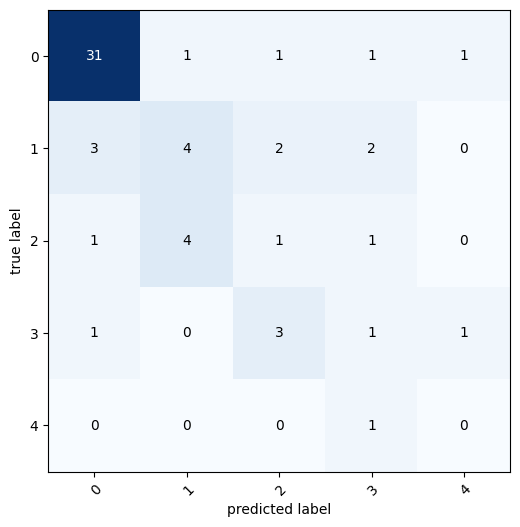

In [140]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['0', '1', '2', '3', '4'])
plt.show()
accuracy_heart.append(accuracy_score(y_test, y_pred))
precision_heart.append(precision_score(y_test, y_pred, average='weighted'))
recall_heart.append(recall_score(y_test, y_pred, average='weighted'))


SVM

Accuracy:  0.6166666666666667
Precision:  0.5537855297157622
Recall:  0.6166666666666667
Confusion Matrix:


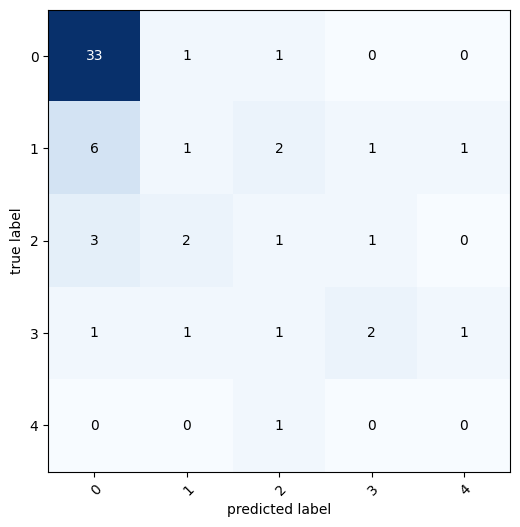

In [141]:
classifier = SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['0', '1', '2', '3', '4'])
plt.show()
accuracy_heart.append(accuracy_score(y_test, y_pred))
precision_heart.append(precision_score(y_test, y_pred, average='weighted'))
recall_heart.append(recall_score(y_test, y_pred, average='weighted'))


Comaprison Heart

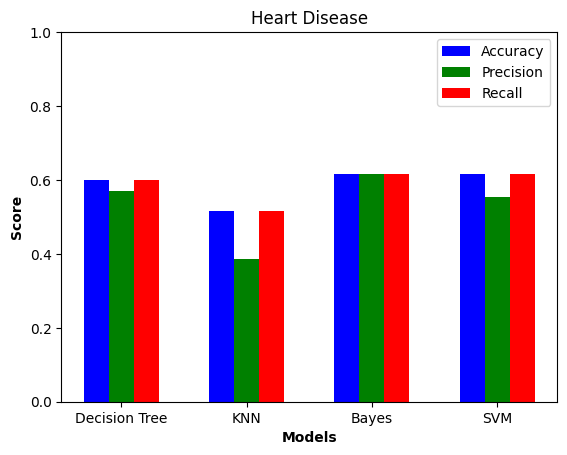

In [142]:
make_plot('Heart Disease',accuracy_heart,precision_heart,recall_heart)

Wine

In [143]:
wine_data = pd.read_csv('wine.csv',sep=',',index_col=0)
wine_data.head()
x_wine = wine_data[wine_data.columns[:13]]
y_wine = wine_data['class']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_wine, y_wine, test_size=0.2, random_state=5)

accuracy_wine = []
precision_wine = []
recall_wine = []

Decesion Tree

Accuracy:  0.8611111111111112
Precision:  0.8812169312169312
Recall:  0.8611111111111112
Confusion Matrix:


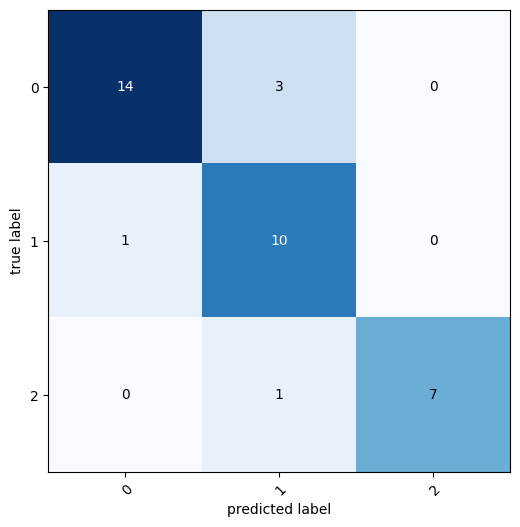

In [144]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['0', '1', '2'])
plt.show()
accuracy_wine.append(accuracy_score(y_test, y_pred))
precision_wine.append(precision_score(y_test, y_pred, average='weighted'))
recall_wine.append(recall_score(y_test, y_pred, average='weighted'))


KNN

Accuracy:  0.6666666666666666
Precision:  0.6853395061728395
Recall:  0.6666666666666666
Confusion Matrix:


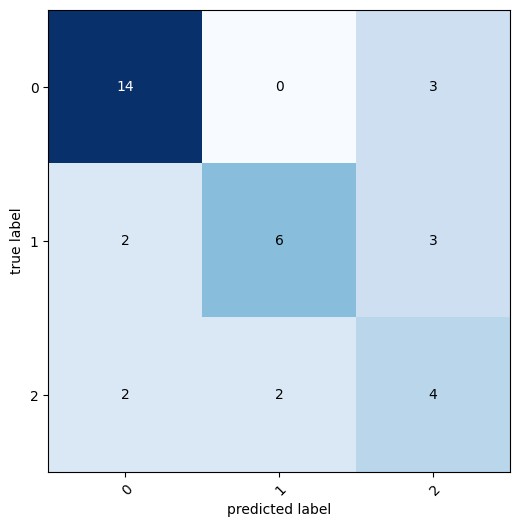

In [145]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['0', '1', '2'])
plt.show()
accuracy_wine.append(accuracy_score(y_test, y_pred))
precision_wine.append(precision_score(y_test, y_pred, average='weighted'))
recall_wine.append(recall_score(y_test, y_pred, average='weighted'))

Bayes

Accuracy:  0.9166666666666666
Precision:  0.9345238095238094
Recall:  0.9166666666666666
Confusion Matrix:


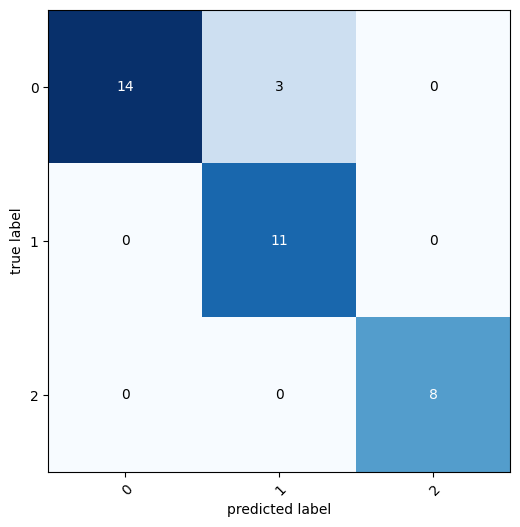

In [146]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['0', '1', '2'])
plt.show()
accuracy_wine.append(accuracy_score(y_test, y_pred))
precision_wine.append(precision_score(y_test, y_pred, average='weighted'))
recall_wine.append(recall_score(y_test, y_pred, average='weighted'))

SVM

Accuracy:  0.9166666666666666
Precision:  0.9212962962962964
Recall:  0.9166666666666666
Confusion Matrix:


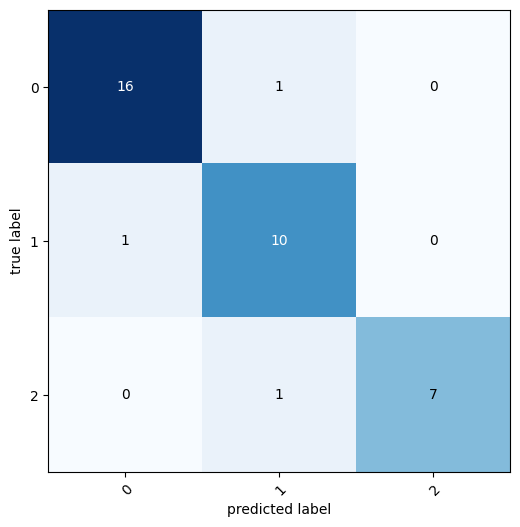

In [147]:
classifier = SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['0', '1', '2'])
plt.show()
accuracy_wine.append(accuracy_score(y_test, y_pred))
precision_wine.append(precision_score(y_test, y_pred, average='weighted'))
recall_wine.append(recall_score(y_test, y_pred, average='weighted'))


Compare Wine

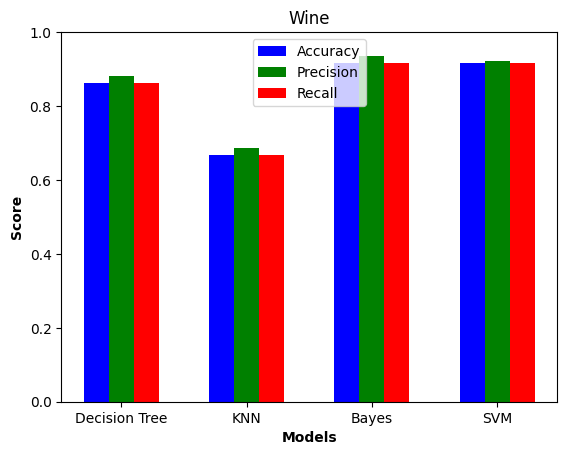

In [148]:
make_plot('Wine',accuracy_wine,precision_wine,recall_wine)

Automobile

In [149]:
Automobile_data = pd.read_csv('automobile.csv',index_col=0)
Automobile_data.head()
# import pandas as pd

# Assuming your dataset is loaded into a DataFrame called df
# Replace 'df' with the actual name of your DataFrame if different

# Select columns with data type 'object'
object_columns = Automobile_data.select_dtypes(include=['object'])

# Get the names of these columns
object_column_names = object_columns.columns.tolist()

# Print the names of columns with object data type
print("Columns with object data type:")
print(object_column_names)

# import pandas as pd

# Assuming your dataset is loaded into a DataFrame called Automobile_data
# Replace 'Automobile_data' with the actual name of your DataFrame if different

# Columns to one-hot encode
columns_to_encode = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']

# Perform one-hot encoding
Automobile_data_encoded = pd.get_dummies(Automobile_data, columns=columns_to_encode)

# Display the resulting DataFrame with one-hot encoded columns
print(Automobile_data_encoded.head())

x_auto = Automobile_data_encoded.drop('symboling', axis=1)
y_auto = Automobile_data_encoded['symboling']
len(Automobile_data_encoded.columns)
Automobile_data_encoded.head()
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_auto, y_auto, test_size=0.2, random_state=5)

auto_accuracy = []
auto_precision = []
auto_recall = []

y_auto.unique()

Columns with object data type:
['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']
    normalized-losses  num-of-doors  wheel-base  length  width  height  \
3               164.0           4.0        99.8   176.6   66.2    54.3   
4               164.0           4.0        99.4   176.6   66.4    54.3   
6               158.0           4.0       105.8   192.7   71.4    55.7   
8               158.0           4.0       105.8   192.7   71.4    55.9   
10              192.0           2.0       101.2   176.8   64.8    54.3   

    curb-weight  num-of-cylinders  engine-size  bore  ...  engine-type_l  \
3          2337                 4          109  3.19  ...          False   
4          2824                 5          136  3.19  ...          False   
6          2844                 5          136  3.19  ...          False   
8          3086                 5          131  3.13  ...          False   
10         2395              

array([ 2,  1,  0, -1,  3, -2])

Decision Tree

In [150]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
# fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['-2','-1', '0', '1', '2', '3'])
# plt.show()
auto_accuracy.append(accuracy_score(y_test, y_pred))
auto_precision.append(precision_score(y_test, y_pred, average='weighted'))
auto_recall.append(recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.78125
Precision:  0.8221590909090908
Recall:  0.78125
Confusion Matrix:


KNN

Accuracy:  0.375
Precision:  0.3526785714285714
Recall:  0.375
Confusion Matrix:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


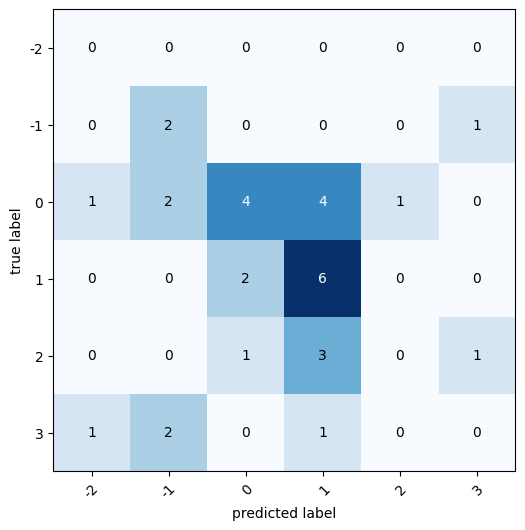

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [151]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['-2' ,'-1', '0', '1', '2', '3'])
plt.show()
auto_accuracy.append(accuracy_score(y_test, y_pred))
auto_precision.append(precision_score(y_test, y_pred, average='weighted'))
auto_recall.append(recall_score(y_test, y_pred, average='weighted'))

Bayes

Accuracy:  0.71875
Precision:  0.828125
Recall:  0.71875
Confusion Matrix:


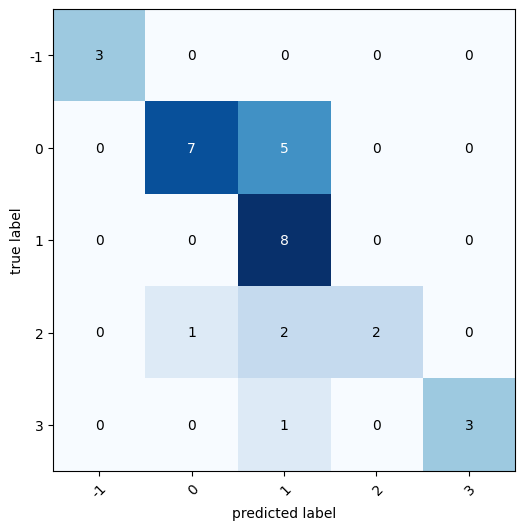

In [152]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['-1', '0', '1', '2', '3'])
plt.show()
auto_accuracy.append(accuracy_score(y_test, y_pred))
auto_precision.append(precision_score(y_test, y_pred, average='weighted'))
auto_recall.append(recall_score(y_test, y_pred, average='weighted'))


SVM

Accuracy:  0.625
Precision:  0.7833333333333334
Recall:  0.625
Confusion Matrix:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


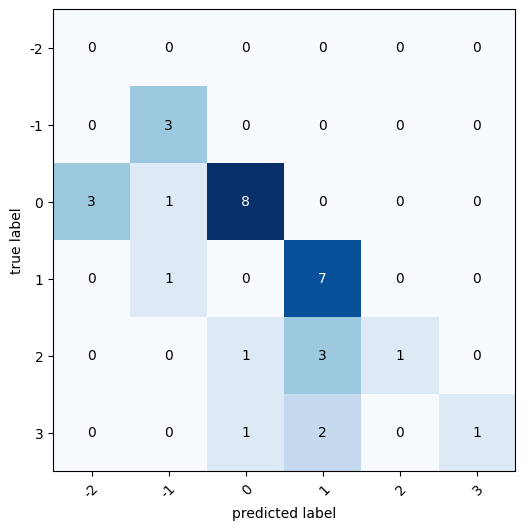

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [153]:
classifier = SVC(kernel='linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
conf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), class_names=['-2', '-1', '0', '1', '2', '3'])
plt.show()
auto_accuracy.append(accuracy_score(y_test, y_pred))
auto_precision.append(precision_score(y_test, y_pred, average='weighted'))
auto_recall.append(recall_score(y_test, y_pred, average='weighted'))


Comparison auto


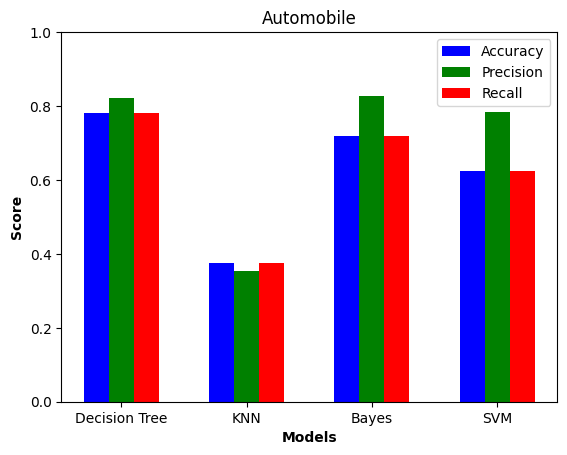

In [154]:
make_plot('Automobile',auto_accuracy,auto_precision,auto_recall)

CART

In [163]:
def classify(x,y,classifier,test_size=0.2):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average="weighted",zero_division=0)
    recall=recall_score(y_test,y_pred,average="weighted",zero_division=0)
    print(f"accuracy\t:\t{accuracy}\nprecision\t:\t{precision}\nrecall\t:\t{recall}")
    return accuracy,precision,recall

In [164]:
def make_plot(accuracy,precision,recall):
    categories = ['heart_disease','wine','automobile']
    bar_width = 0.2

    r1 = np.arange(len(categories))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    plt.bar(r1, accuracy, color='b', width=bar_width, label='Accuracy')
    plt.bar(r2, precision, color='g', width=bar_width, label='Precision')
    plt.bar(r3, recall, color='r', width=bar_width, label='Recall')

    plt.title("CART Model")
    plt.xlabel('Models', fontweight='bold')
    plt.ylabel('Score', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylim([0,1])

    plt.legend()

    plt.show()

In [165]:
#Heart disease

data = pd.read_csv('heart_disease.csv')

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

accuracy_list=[]
precision_list=[]
recall_list=[]

In [166]:
model=DecisionTreeClassifier(random_state=10,criterion="gini")
acc,prec,recl=classify(x,y,model)
print(f"height : {model.tree_.max_depth}")

accuracy_list.append(acc)
precision_list.append(prec)
recall_list.append(recl)

accuracy	:	0.48333333333333334
precision	:	0.5568735186382247
recall	:	0.48333333333333334
height : 10


In [167]:
data = pd.read_csv('wine.csv')

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [168]:
model=DecisionTreeClassifier(random_state=10,criterion="gini")
acc,prec,recl=classify(x,y,model)
print(f"height : {model.tree_.max_depth}")

accuracy_list.append(acc)
precision_list.append(prec)
recall_list.append(recl)

accuracy	:	0.9722222222222222
precision	:	0.9743589743589745
recall	:	0.9722222222222222
height : 2


In [169]:
data = Automobile_data_encoded
x = Automobile_data_encoded.drop(columns=["symboling"])
y = Automobile_data_encoded.loc[:,"symboling"]

In [170]:
model=DecisionTreeClassifier(random_state=10,criterion="gini")
acc,prec,recl=classify(x,y,model)
print(f"height : {model.tree_.max_depth}")

accuracy_list.append(acc)
precision_list.append(prec)
recall_list.append(recl)

accuracy	:	0.6875
precision	:	0.7213541666666666
recall	:	0.6875
height : 9


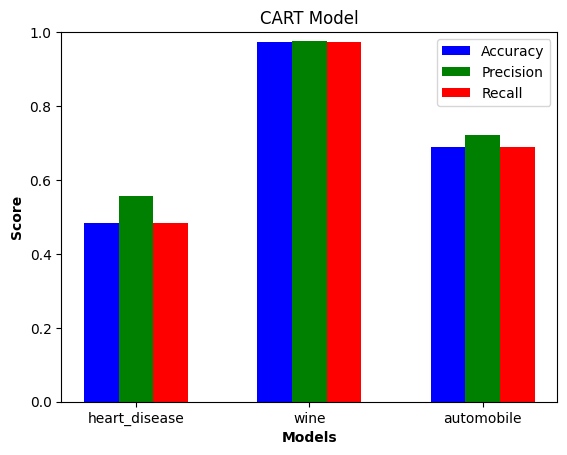

In [171]:
make_plot(accuracy_list,precision_list,recall_list)

In [ ]:
import tensorflow as tf
weights = tf.Variable([tf.random.normal([1])])
biases = tf.Variable(tf.random.normal([1]))
while True:
    with tf.GradientTape() as tape:
        y_pred = weights * x_train + biases
        loss = tf.reduce_mean(tf.square(y_pred - y_train))
    dloss_dw, dloss_db = tape.gradient(loss, [weights, biases])
    weights.assign_sub(0.05 * dloss_dw)
    biases.assign_sub(0.05 * dloss_db)
    